<a href="https://colab.research.google.com/github/VivekGangurde94/Mlproject/blob/main/yolo_AF_Formation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy
src_path='drive/MyDrive/AF_Formation'

train_path=os.path.join(src_path,'train')
val_path=os.path.join(src_path,'validation')

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 16.6 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

In [5]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.28M/5.28M [00:00<00:00, 109MB/s]


In [7]:
result = model.train(data='drive/MyDrive/AF_Formation',epochs=20, imgsz=64)

Ultralytics YOLOv8.0.152 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=drive/MyDrive/AF_Formation, epochs=20, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False,

In [8]:
# to download or the data to the drive
!scp -r /content/runs '/content/drive/MyDrive/AF_formation_results'

In [9]:
model=YOLO('drive/MyDrive/AF_formation_results/runs/classify/train/weights/last.pt') #load a custom model

In [84]:
results= model('drive/MyDrive/AF_Formation/test/Screenshot 2023-08-12 015448.png')


image 1/1 /content/drive/MyDrive/AF_Formation/test/Screenshot 2023-08-12 015448.png: 64x64 Double Wing 0.91, Kick Off 0.05, Right Tri 0.04, Double wing Balanced 0.00, Extra Point 0.00, 6.5ms
Speed: 0.6ms preprocess, 6.5ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)


In [ ]:
print(results)

In [86]:
names_dict=results[0].names
probs=results[0].probs
print(probs)
print(names_dict)

ultralytics.engine.results.Probs object with attributes:

data: tensor([9.0777e-01, 5.5410e-04, 5.1263e-04, 4.8490e-02, 4.2669e-02])
orig_shape: None
shape: torch.Size([5])
top1: 0
top1conf: tensor(0.9078)
top5: [0, 3, 4, 1, 2]
top5conf: tensor([9.0777e-01, 4.8490e-02, 4.2669e-02, 5.5410e-04, 5.1263e-04])
{0: 'Double Wing', 1: 'Double wing Balanced', 2: 'Extra Point', 3: 'Kick Off', 4: 'Right Tri'}


In [87]:
probs = results[0].probs.data.tolist()
class_labels = results[0].names

print(probs)
print(class_labels)

[0.907774806022644, 0.0005541027057915926, 0.00051263184286654, 0.04848984256386757, 0.042668696492910385]
{0: 'Double Wing', 1: 'Double wing Balanced', 2: 'Extra Point', 3: 'Kick Off', 4: 'Right Tri'}


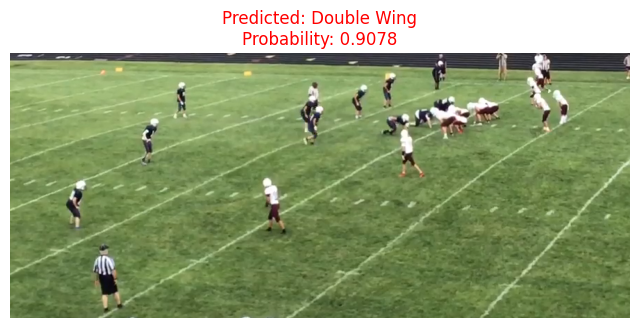

In [89]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'drive/MyDrive/AF_Formation/test/Screenshot 2023-08-12 015448.png'
image = Image.open(image_path)


probs = results[0].probs.data.tolist()
class_labels = results[0].names


# Find the index of the class with the highest probability
predicted_index = max(range(len(probs)), key=lambda i: probs[i])

# Get the predicted class label and its probability
predicted_label = class_labels[predicted_index]
predicted_prob = probs[predicted_index]

# Display the image and the prediction
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.title(f'Predicted: {predicted_label}\nProbability: {predicted_prob:.4f}', color='red')

# Show the plot
plt.show()


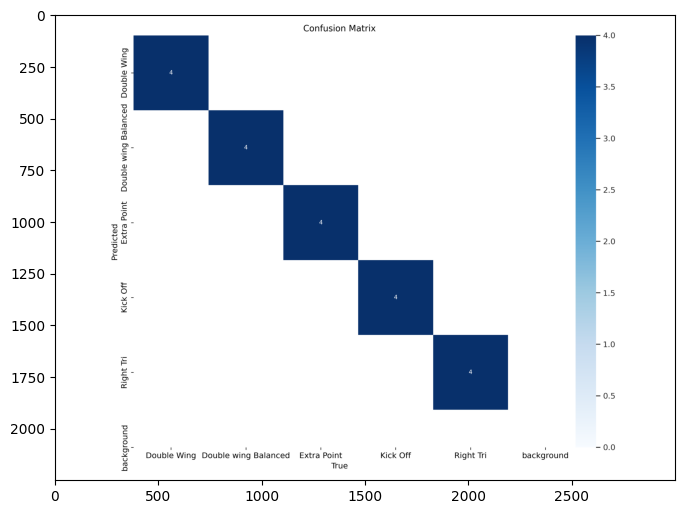

In [94]:
image_path1 = '/content/drive/MyDrive/AF_formation_results/runs/classify/train/confusion_matrix.png'
image = Image.open(image_path1)
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

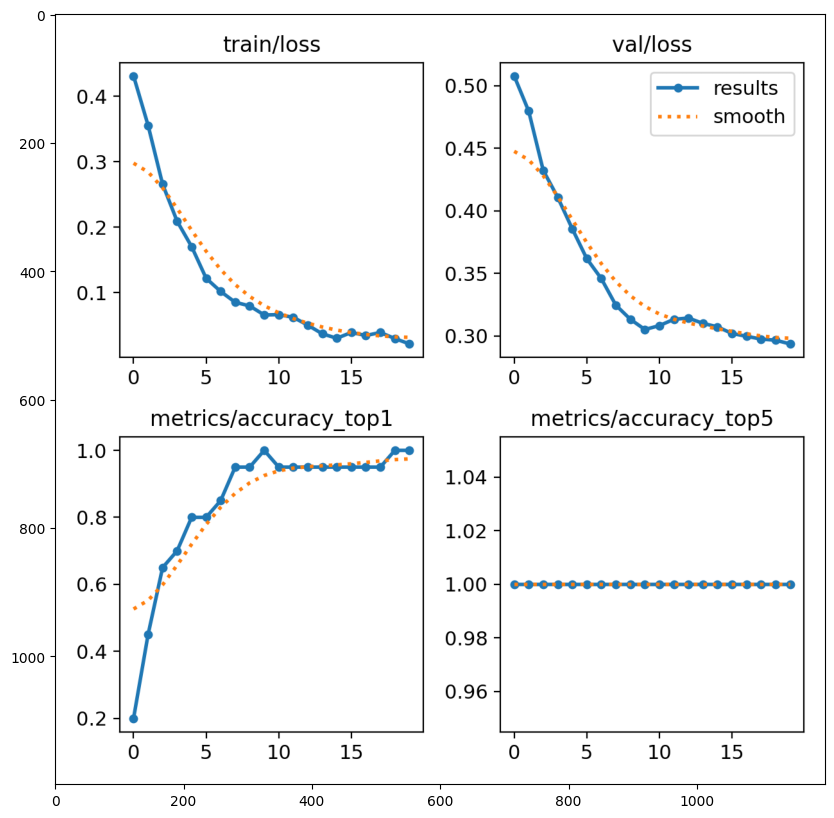

In [98]:
image_path1 = '/content/drive/MyDrive/AF_formation_results/runs/classify/train/results.png'
image = Image.open(image_path1)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

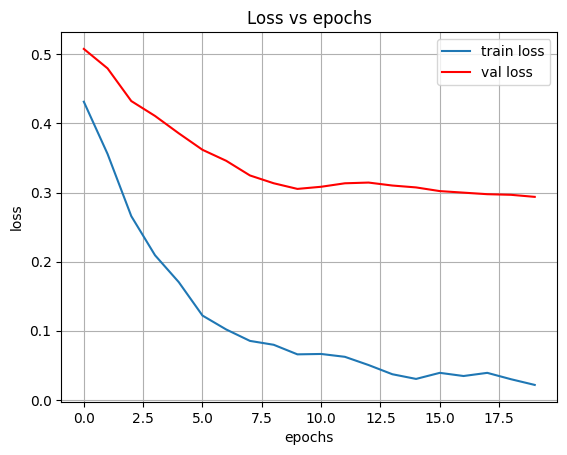

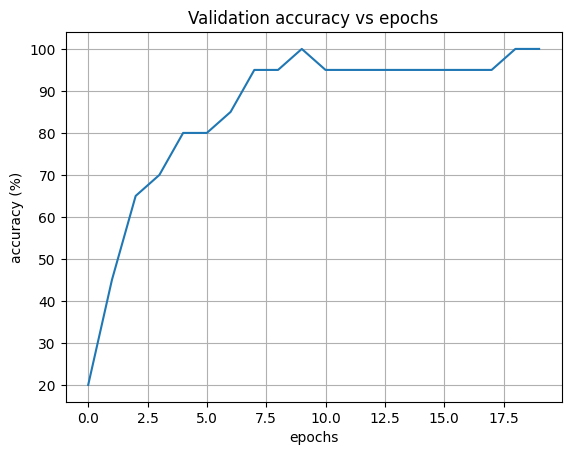

In [109]:
import os
import pandas as pd
import matplotlib.pyplot as plt


results_path = '/content/drive/MyDrive/AF_formation_results/runs/classify/train/results.csv'

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')

plt.show()